In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

IMPORT

In [ ]:
import cv2

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

DATA


In [ ]:
dir_path = '/content/gdrive/MyDrive/DATA/DATASET/CNN letter Dataset/'
list_labels = np.array(os.listdir(dir_path))
imgs = []
labels = []
for label in list_labels:
  img_list = os.listdir(dir_path + label)
  for img in img_list:
    img = os.path.join(dir_path + label + '/' + img)
    imgs.append(img)
    labels.append(label)
imgs = np.array(imgs)
labels = np.array(labels)
print(list_labels)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [ ]:
df = pd.DataFrame({'Path': imgs, 'Labels': labels})
print(df)

                                                    Path Labels
0      /content/gdrive/MyDrive/DATA/DATASET/CNN lette...      0
1      /content/gdrive/MyDrive/DATA/DATASET/CNN lette...      0
2      /content/gdrive/MyDrive/DATA/DATASET/CNN lette...      0
3      /content/gdrive/MyDrive/DATA/DATASET/CNN lette...      0
4      /content/gdrive/MyDrive/DATA/DATASET/CNN lette...      0
...                                                  ...    ...
35495  /content/gdrive/MyDrive/DATA/DATASET/CNN lette...      Z
35496  /content/gdrive/MyDrive/DATA/DATASET/CNN lette...      Z
35497  /content/gdrive/MyDrive/DATA/DATASET/CNN lette...      Z
35498  /content/gdrive/MyDrive/DATA/DATASET/CNN lette...      Z
35499  /content/gdrive/MyDrive/DATA/DATASET/CNN lette...      Z

[35500 rows x 2 columns]


VIEW DATA

In [ ]:
def plot_sample(df):
  plt.figure(figsize=(14,10))
  for i in range(20):
      random = np.random.randint(0,len(df))
      plt.subplot(4,5,i+1)
      plt.imshow(cv.imread(df.loc[random, 'Path']))
      plt.title(df.loc[random, 'Labels'], size = 10, color = "black") 
      plt.xticks([])
      plt.yticks([])
      
  plt.show()

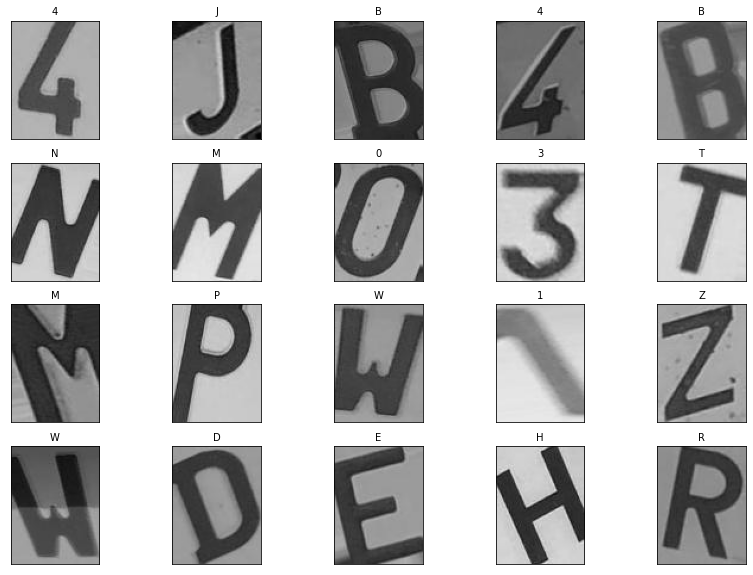

In [ ]:
plot_sample(df)

SPLIT DATASET INTO TRAIN, TEST, VALIDATION

In [ ]:
Train_df, Test_df = train_test_split(df, test_size = 0.2, random_state = 101)
Train_df, Valid_df = train_test_split(Train_df, test_size = 0.1, random_state = 101)

In [ ]:
Train_df = Train_df.reset_index(drop = True)
Test_df = Test_df.reset_index(drop = True)
Valid_df = Valid_df.reset_index(drop = True)

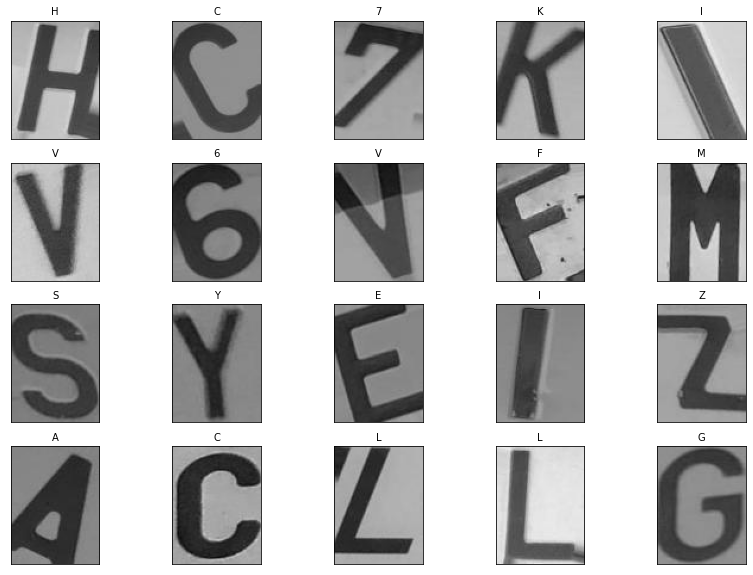

In [ ]:
plot_sample(Train_df)

GENERATOR

In [ ]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

Train_gen = dataGen.flow_from_dataframe(
    Train_df,
    x_col = 'Path', 
    y_col = 'Labels',
    target_size = (128, 128),
    batch_size = 512,
    class_mode = 'categorical',
    color_mode='rgb'
)

Test_gen = dataGen.flow_from_dataframe(
    Test_df,
    x_col = 'Path', 
    y_col = 'Labels',
    target_size = (128, 128),
    batch_size = 512,
    class_mode = 'categorical',
    color_mode='rgb'
)

Valid_gen = dataGen.flow_from_dataframe(
    Valid_df,
    x_col = 'Path', 
    y_col = 'Labels',
    target_size = (128, 128),
    batch_size = 512,
    class_mode = 'categorical',
    color_mode='rgb'
)

Found 25560 validated image filenames belonging to 35 classes.
Found 7100 validated image filenames belonging to 35 classes.
Found 2840 validated image filenames belonging to 35 classes.


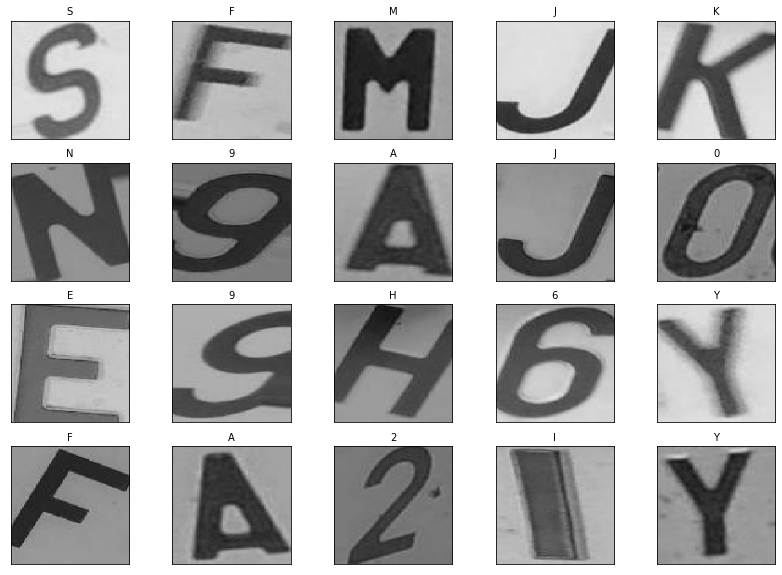

In [ ]:
imgs,labels=next(Train_gen) # get a sample batch from the generator   
plt.figure(figsize=(14, 10))
for i in range(20):
      random = np.random.randint(0,len(imgs))
      plt.subplot(4,5,i+1)
      plt.imshow(imgs[random])
      plt.title(list_labels[np.argmax(labels[random])], size = 10, color = "black") 
      plt.xticks([])
      plt.yticks([])
plt.show()

CREATE MODEL

In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten
    tf.keras.layers.Flatten(),

    # Fully connected + Dropout => prevent overfitting
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output
    tf.keras.layers.Dense(len(list_labels), activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

TRAIN MODEL

In [ ]:
model.fit(Train_gen, epochs = 10, validation_data = Valid_gen, verbose = 1)

Epoch 1/10
50/50 [==============================] - 1395s 28s/step - loss: 3.1934 - accuracy: 0.1359 - val_loss: 1.7496 - val_accuracy: 0.6444
Epoch 2/10
50/50 [==============================] - 1342s 27s/step - loss: 1.2242 - accuracy: 0.6369 - val_loss: 0.2956 - val_accuracy: 0.9306
Epoch 3/10
50/50 [==============================] - 1337s 27s/step - loss: 0.5326 - accuracy: 0.8381 - val_loss: 0.1057 - val_accuracy: 0.9768
Epoch 4/10
50/50 [==============================] - 1336s 27s/step - loss: 0.2846 - accuracy: 0.9146 - val_loss: 0.0424 - val_accuracy: 0.9915
Epoch 5/10
50/50 [==============================] - 1388s 28s/step - loss: 0.1781 - accuracy: 0.9467 - val_loss: 0.0239 - val_accuracy: 0.9933
Epoch 6/10
50/50 [==============================] - 1339s 27s/step - loss: 0.1297 - accuracy: 0.9618 - val_loss: 0.0314 - val_accuracy: 0.9919
Epoch 7/10
50/50 [==============================] - 1334s 27s/step - loss: 0.0968 - accuracy: 0.9722 - val_loss: 0.0134 - val_accuracy: 0.9972

In [ ]:
test_loss, test_acc = model.evaluate(Test_gen, verbose=2)

14/14 - 98s - loss: 0.0141 - accuracy: 0.9975 - 98s/epoch - 7s/step


In [ ]:
print("Test accuracy: ", test_acc)

Test accuracy:  0.9974647760391235


In [ ]:
%cd /content/gdrive/MyDrive/DATA
model.save('Model_classification.h5')

/content/gdrive/MyDrive/DATA


In [ ]:
imgs, labels = next(Test_gen)

In [ ]:
imgs[0].shape

(128, 128, 3)

In [ ]:
prediction = model.predict(imgs)

16/16 [==============================] - 6s 386ms/step


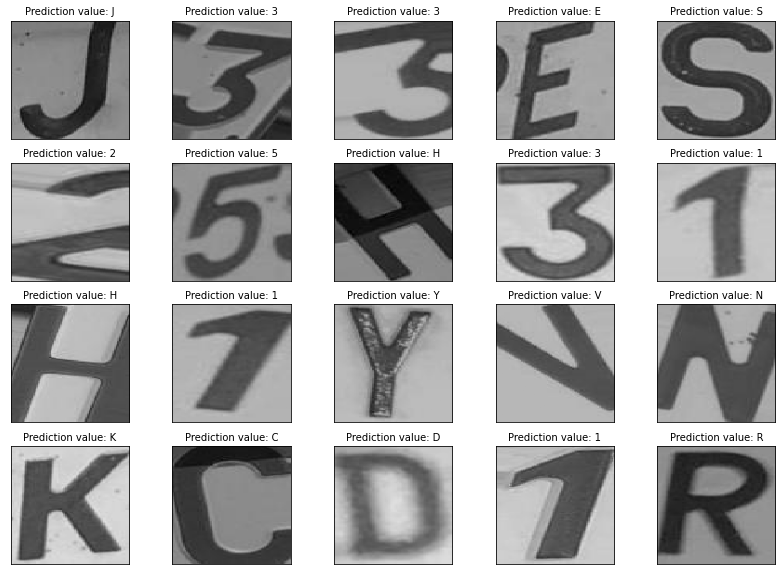

In [ ]:
plt.figure(figsize=(14, 10))
for i in range(20):
      random = np.random.randint(0,len(imgs))
      plt.subplot(4,5,i+1)
      plt.imshow(imgs[random])
      plt.title('Prediction value: ' + list_labels[np.argmax(prediction[random])], size = 10, color = "black") 
      plt.xticks([])
      plt.yticks([])
plt.show()

CHECK MODEL IN NEW IMAGE

In [ ]:
list_labels = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z']

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/DATA/Model_classification.h5')

In [ ]:
from tensorflow.python.ops.gen_logging_ops import image_summary
def load_image(filename):
  image = np.array(tf.keras.preprocessing.image.load_img(filename, target_size = (128, 128), color_mode = 'rgb'))
  # _,image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = image.astype('float32')
  image = image / 255.0
  #image = np.array([image])
  return image

In [ ]:
def show_predict(img, model):
  plt.figure()
  plt.imshow(img)
  plt.title('Prediction value: ' + list_labels[np.argmax(model.predict(np.array([img])))], size = 10, color = "black") 
  plt.xticks([])
  plt.yticks([])
  plt.show()

1/1 [==============================] - 0s 15ms/step


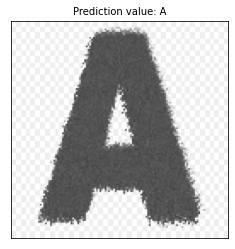

In [ ]:
img = load_image('/content/gdrive/MyDrive/DATA/TEST_IMG/kisspng-letter-alphabet-green-image-a-letter-png-photo-png-all-5c7ed229efeba3.6859165815518152099827.jpg')
show_predict(img, model)

1/1 [==============================] - 0s 65ms/step


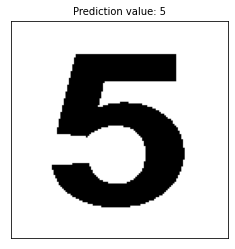

In [ ]:
img = load_image('/content/gdrive/MyDrive/DATA/TEST_IMG/y-nghia-cua-so-5-theo-kinh-dich-626454.jpg')
show_predict(img, model)

1/1 [==============================] - 0s 15ms/step


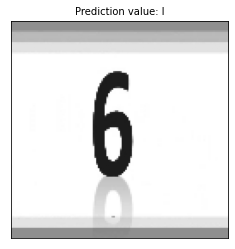

In [ ]:
img = load_image('/content/gdrive/MyDrive/DATA/TEST_IMG/maxresdefault.jpg')
show_predict(img, model)

1/1 [==============================] - 0s 14ms/step


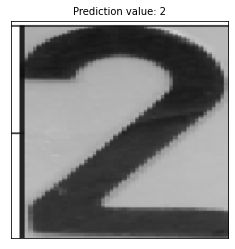

In [ ]:
img = load_image('/content/gdrive/MyDrive/DATA/TEST_IMG/Untitled.png')
show_predict(img, model)